## Assignment 3 Part 2: Titanic Dataset


Importing libraries and importing titanic.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()
titanic = pd.read_csv("titanic.csv")

**Check the head of the DataFrame and getting information of the data.**

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We are going to test the following three hypothesis about the data:
- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age

Before going in depth into the three hypothesis, we are going to see the distribution of each variable of interest.

**1. Survival Rate**

In [10]:
survival_freq = titanic['Survived'].value_counts()
survival_freq

0    549
1    342
Name: Survived, dtype: int64

Bar graph:

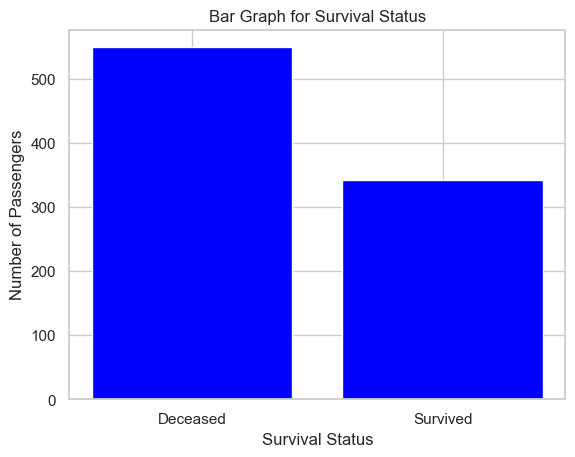

In [59]:
plt.bar(['Deceased','Survived'], survival_freq.values, color = "blue")
plt.title("Bar Graph for Survival Status")
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.savefig("bargraph_survival.png")
plt.show()

**2. Class of Passenger**

In [11]:
pclass_freq = titanic['Pclass'].value_counts()
pclass_freq

3    491
1    216
2    184
Name: Pclass, dtype: int64

Bar graph:

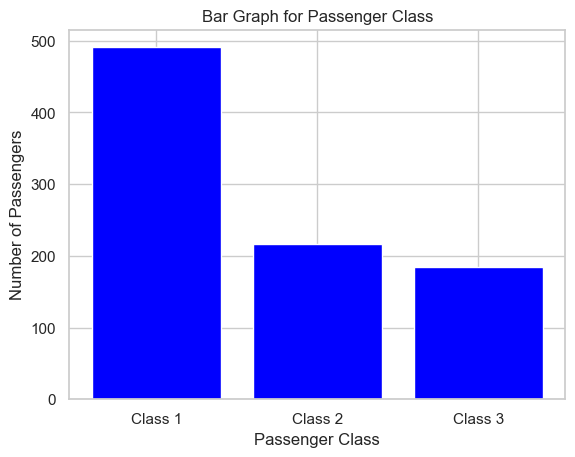

In [60]:
plt.bar(['Class 1','Class 2','Class 3'], pclass_freq.values, color = "blue")
plt.title("Bar Graph for Passenger Class")
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.savefig("bargraph_pclass.png")
plt.show()

**3. Gender**

In [13]:
gender_freq = titanic['Sex'].value_counts()
gender_freq

male      577
female    314
Name: Sex, dtype: int64

Bar graph:

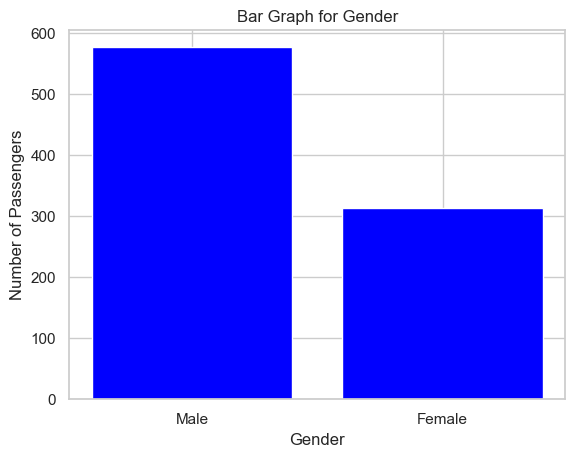

In [61]:
plt.bar(['Male','Female'], gender_freq.values, color = "blue")
plt.title("Bar Graph for Gender")
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.savefig("bargraph_gender.png")
plt.show()

**4. Age**

In [16]:
age_summary = titanic['Age'].describe()
age_summary

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Histogram of the data:

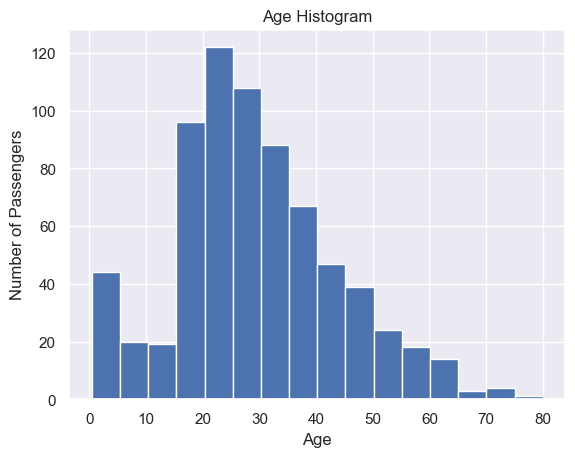

In [17]:
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.hist(titanic['Age'], bins = 16)
plt.savefig("histogram_age.png")
plt.show()

In [18]:
bin_edges = [0, 12, 40, float('inf')]
bin_labels = ['Under 12', '12 to 40', '40 and above']
titanic['Age_Category'] = pd.cut(titanic['Age'], bins=bin_edges, labels=bin_labels, right=False)

In [19]:
agecat_freq = titanic['Age_Category'].value_counts()
agecat_freq

12 to 40        483
40 and above    163
Under 12         68
Name: Age_Category, dtype: int64

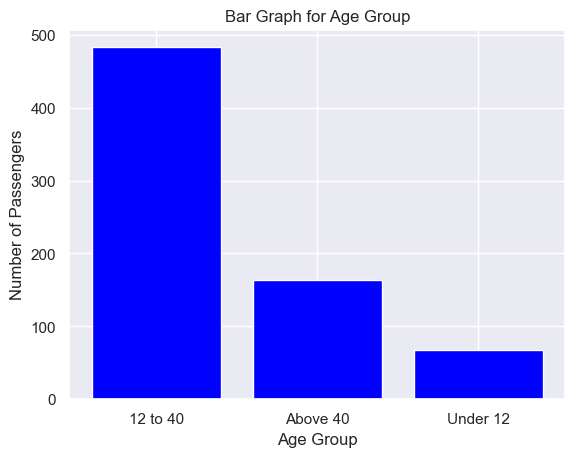

In [20]:
plt.bar(['12 to 40','Above 40', 'Under 12'], agecat_freq.values, color = "blue")
plt.title("Bar Graph for Age Group")
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.savefig("bargraph_agegroup.png")
plt.show()

We are going to run Chi-Squared test of independence for each of the hypothesis.

In [21]:
from scipy.stats import chi2_contingency

**Survival rate vs Class of passenger**

In [22]:
contingency_table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
stat, p, dof, expected = chi2_contingency(contingency_table)
p

4.549251711298793e-23

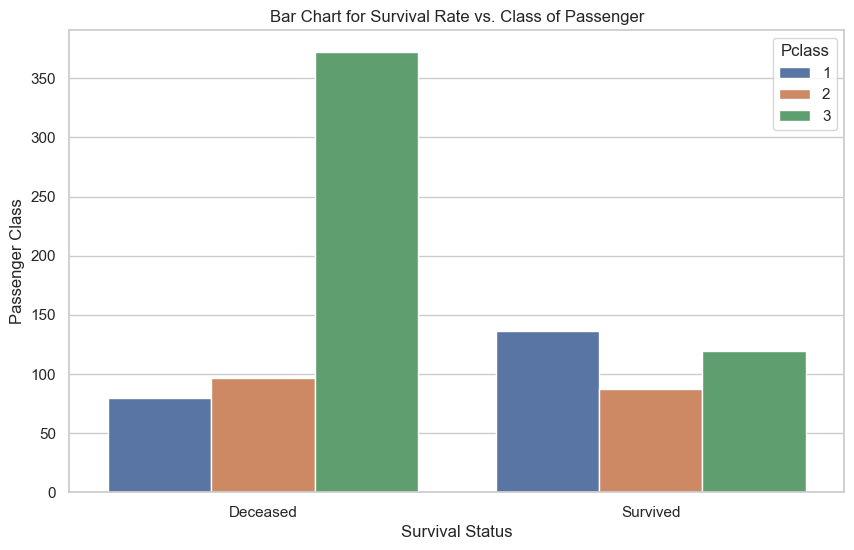

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=titanic, x='Survived', hue='Pclass')
plt.xlabel('Survival Status')
plt.ylabel('Passenger Class')
plt.title('Bar Chart for Survival Rate vs. Class of Passenger')
custom_x_labels = ['Deceased', 'Survived']
plt.xticks(range(len(custom_x_labels)), custom_x_labels)
plt.savefig("bar_survival_vs_class.png")
plt.show()

**Survival rate vs Gender**

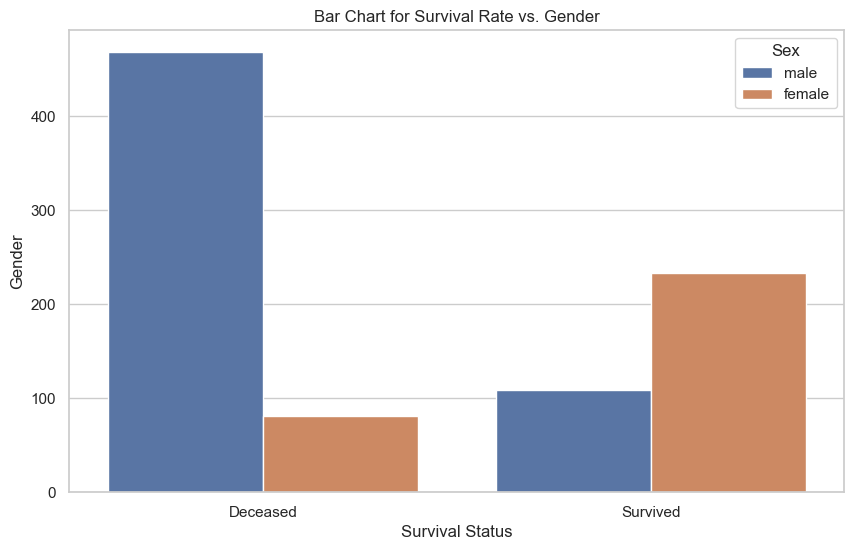

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=titanic, x='Survived', hue='Sex')
plt.xlabel('Survival Status')
plt.ylabel('Gender')
plt.title('Bar Chart for Survival Rate vs. Gender')
custom_x_labels = ['Deceased', 'Survived']
plt.xticks(range(len(custom_x_labels)), custom_x_labels)
plt.savefig("bar_survival_vs_gender.png")
plt.show()

In [25]:
contingency_table = pd.crosstab(titanic['Survived'], titanic['Sex'])
stat, p, dof, expected = chi2_contingency(contingency_table)
p

1.1973570627755645e-58

**Survival rate vs Age**

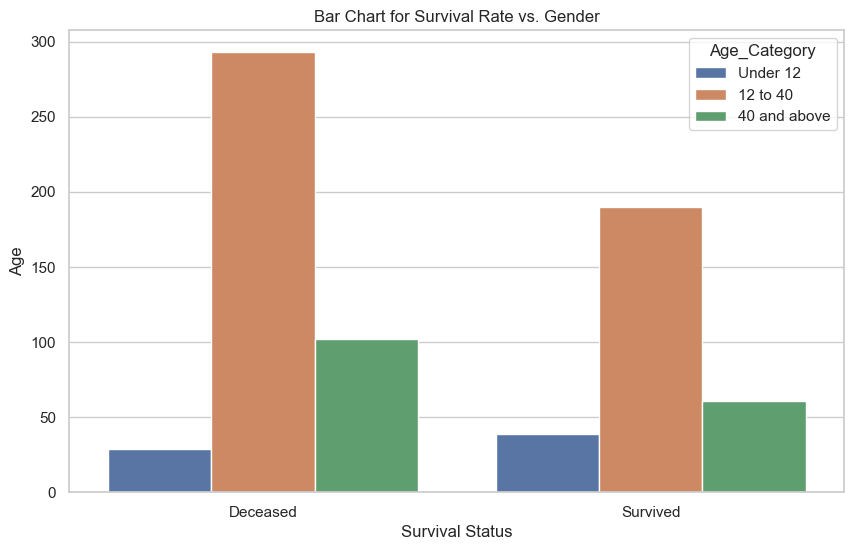

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=titanic, x='Survived', hue='Age_Category')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.title('Bar Chart for Survival Rate vs. Gender')
custom_x_labels = ['Deceased', 'Survived']
plt.xticks(range(len(custom_x_labels)), custom_x_labels)
plt.savefig("bar_survival_vs_agegroup.png")
plt.show()

In [27]:
contingency_table = pd.crosstab(titanic['Survived'], titanic['Age_Category'])
stat, p, dof, expected = chi2_contingency(contingency_table)
p

0.011598401341613673